<a href="https://colab.research.google.com/github/asole91/Hello_Word/blob/main/interpretability_and_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Introduction to Deep Learning
IWANN 2021 Tutorial

---

Raul Benitez, PhD

Universitat Politècnica de Catalunya

contact: raul.benitez@upc.edu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_data = '/content/drive/MyDrive/IWANN_course_data'
load_data = 'False' #Set to 'True' to load data and avoid time consuming executions

# Part 5: Gaussian and Salt&Pepper Noise


## Libraries

In [ ]:
!pip install tf-keras-vis
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from skimage.util import random_noise
import os
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam import GradcamPlusPlus
from tf_keras_vis.utils.scores import CategoricalScore

     |████████████████████████████████| 53 kB 2.1 MB/s 


## Functions

In [ ]:
# Function to select all the 10 numbers in a set
def findInd(classes):
  Ind = np.zeros(10)
  count = 0
  while (count<10):
    for i in range(classes.shape[0]):
      if(classes[i] == count):
        Ind[count]=i
        count = count+1
        break
      else:
        continue
  return Ind

In [ ]:
# Function to plot an image
def imgG (n,img,title):
    plt.subplot(n)
    plt.imshow(img, cmap = 'gray')
    plt.title(title)
    plt.axis('off')

In [ ]:
# Function to plot a heatmap
def imgH (n,img,title):
    heatmap = np.uint8(cm.jet(img)[..., :3] * 255)
    plt.subplot(n)
    plt.imshow(heatmap, cmap='jet', alpha=1)
    plt.title(title)
    plt.axis('off')

In [ ]:
# Function to plot indexed images of a set
def show(Set,Ind):
  fig = plt.figure(figsize=(14, 6))
  imgG(151,Set[int(Ind[0])].reshape(28,28),'number 0')
  imgG(152,Set[int(Ind[1])].reshape(28,28),'number 1')
  imgG(153,Set[int(Ind[2])].reshape(28,28),'number 2')
  imgG(154,Set[int(Ind[3])].reshape(28,28),'number 3')
  imgG(155,Set[int(Ind[4])].reshape(28,28),'number 4')

  fig = plt.figure(figsize=(14, 6))
  imgG(151,Set[int(Ind[5])].reshape(28,28),'number 5')
  imgG(152,Set[int(Ind[6])].reshape(28,28),'number 6')
  imgG(153,Set[int(Ind[7])].reshape(28,28),'number 7')
  imgG(154,Set[int(Ind[8])].reshape(28,28),'number 8')
  imgG(155,Set[int(Ind[9])].reshape(28,28),'number 9')

In [ ]:
# Function to plot all the 10 images of the cam
def showH(Set):
  fig = plt.figure(figsize=(14, 6))
  imgH(151,Set[0].reshape(28,28),'number 0')
  imgH(152,Set[1].reshape(28,28),'number 1')
  imgH(153,Set[2].reshape(28,28),'number 2')
  imgH(154,Set[3].reshape(28,28),'number 3')
  imgH(155,Set[4].reshape(28,28),'number 4')

  fig = plt.figure(figsize=(14, 6))
  imgH(151,Set[5].reshape(28,28),'number 5')
  imgH(152,Set[6].reshape(28,28),'number 6')
  imgH(153,Set[7].reshape(28,28),'number 7')
  imgH(154,Set[8].reshape(28,28),'number 8')
  imgH(155,Set[9].reshape(28,28),'number 9')

In [ ]:
# Function to add Salt & Pepper noise at defined levels
def SP(Set,levH,levL):
  Set_SP = Set.copy()
  noise = np.random.random(Set.shape[0:3])
  for i in range(Set.shape[0]):
    Set_SP[i][noise[i]>levH]=1
    Set_SP[i][noise[i]<levL]=0
  return Set_SP

In [ ]:
# Function to add Gaussian Noise at a defined level
def ModCre(Set,Classes_M,name,folder_data,model):
  batch_size =256
  epochs = 10
  dir = folder_data  + '/' + name
  if not os.path.exists(dir):
    os.makedirs(dir)

  if load_data == 'False':
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(Set, Classes_M, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    model.save(dir) # save trained model
  else: 
    model = keras.models.load_model(dir)
  return model


In [ ]:
# Function to create the GradCam Images set
def GRA(model,Set,Ind,Classes):
  X = np.array([Set[int(Ind_te[0])],Set[int(Ind_te[1])],Set[int(Ind_te[2])],Set[int(Ind_te[3])],Set[int(Ind_te[4])],Set[int(Ind_te[5])],Set[int(Ind_te[6])],Set[int(Ind_te[7])],Set[int(Ind_te[8])],Set[int(Ind_te[9])]])
  score = CategoricalScore([0,1,2,3,4,5,6,7,8,9])
  gradcam = Gradcam(model,model_modifier=model_modifier,clone=False)
  cam = gradcam(score, X, penultimate_layer=-1)
  return cam

In [ ]:
# Function to create the Gradcam Plus Images set
def GRA_P(model,Set,Ind,Classes):
  X = np.array([Set[int(Ind_te[0])],Set[int(Ind_te[1])],Set[int(Ind_te[2])],Set[int(Ind_te[3])],Set[int(Ind_te[4])],Set[int(Ind_te[5])],Set[int(Ind_te[6])],Set[int(Ind_te[7])],Set[int(Ind_te[8])],Set[int(Ind_te[9])]])
  score = CategoricalScore([0,1,2,3,4,5,6,7,8,9])
  gradcam_P = GradcamPlusPlus(model,model_modifier=model_modifier,clone=False)
  cam = gradcam_P(score, X, penultimate_layer=-1)
  return cam

In [ ]:
def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear
    return current_model

## Download Original DataSet

In [ ]:
# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Index Creation for Printing Examples

In [ ]:
Ind_tr = findInd(y_train)
Ind_te = findInd(y_test)

## DataSet Creation

### Salt&Pepper

In [ ]:
SP_1_tr = SP(x_train,0.990,0.010)
SP_2_tr = SP(x_train,0.980,0.020)
SP_3_tr = SP(x_train,0.970,0.030)
SP_4_tr = SP(x_train,0.960,0.040)
SP_5_tr = SP(x_train,0.950,0.050)
SP_6_tr = SP(x_train,0.940,0.060)
SP_7_tr = SP(x_train,0.930,0.070)
SP_8_tr = SP(x_train,0.920,0.080)
SP_9_tr = SP(x_train,0.910,0.090)

SP_1_te = SP(x_test,0.990,0.010)
SP_2_te = SP(x_test,0.980,0.020)
SP_3_te = SP(x_test,0.970,0.030)
SP_4_te = SP(x_test,0.960,0.040)
SP_5_te = SP(x_test,0.950,0.050)
SP_6_te = SP(x_test,0.940,0.060)
SP_7_te = SP(x_test,0.930,0.070)
SP_8_te = SP(x_test,0.920,0.080)
SP_9_te = SP(x_test,0.910,0.090)

### Gaussian Noise

In [ ]:
GN_1_tr = random_noise(x_train,var=0.0025)
GN_2_tr = random_noise(x_train,var=0.0050)
GN_3_tr = random_noise(x_train,var=0.0075)
GN_4_tr = random_noise(x_train,var=0.0100)
GN_5_tr = random_noise(x_train,var=0.0125)
GN_6_tr = random_noise(x_train,var=0.0150)
GN_7_tr = random_noise(x_train,var=0.0175)
GN_8_tr = random_noise(x_train,var=0.0200)
GN_9_tr = random_noise(x_train,var=0.0225)

GN_1_te = random_noise(x_test,var=0.0025)
GN_2_te = random_noise(x_test,var=0.0050)
GN_3_te = random_noise(x_test,var=0.0075)
GN_4_te = random_noise(x_test,var=0.0100)
GN_5_te = random_noise(x_test,var=0.0125)
GN_6_te = random_noise(x_test,var=0.0150)
GN_7_te = random_noise(x_test,var=0.0175)
GN_8_te = random_noise(x_test,var=0.0200)
GN_9_te = random_noise(x_test,var=0.0225)

## Models Creation

### Basic Model Definition

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### Training model with different Sets

In [ ]:
mod_0 = ModCre(x_train,y_train_cat,'basic_model',folder_data,model)

mod_SP_1 = ModCre(SP_1_tr,y_train_cat,'SP_1',folder_data,model)
mod_SP_2 = ModCre(SP_2_tr,y_train_cat,'SP_2',folder_data,model)
mod_SP_3 = ModCre(SP_3_tr,y_train_cat,'SP_3',folder_data,model)
mod_SP_4 = ModCre(SP_4_tr,y_train_cat,'SP_4',folder_data,model)
mod_SP_5 = ModCre(SP_5_tr,y_train_cat,'SP_5',folder_data,model)
mod_SP_6 = ModCre(SP_6_tr,y_train_cat,'SP_6',folder_data,model)
mod_SP_7 = ModCre(SP_7_tr,y_train_cat,'SP_7',folder_data,model)
mod_SP_8 = ModCre(SP_8_tr,y_train_cat,'SP_8',folder_data,model)
mod_SP_9 = ModCre(SP_9_tr,y_train_cat,'SP_9',folder_data,model)

mod_GN_1 = ModCre(GN_1_tr,y_train_cat,'GN_1',folder_data,model)
mod_GN_2 = ModCre(GN_2_tr,y_train_cat,'GN_2',folder_data,model)
mod_GN_3 = ModCre(GN_3_tr,y_train_cat,'GN_3',folder_data,model)
mod_GN_4 = ModCre(GN_4_tr,y_train_cat,'GN_4',folder_data,model)
mod_GN_5 = ModCre(GN_5_tr,y_train_cat,'GN_5',folder_data,model)
mod_GN_6 = ModCre(GN_6_tr,y_train_cat,'GN_6',folder_data,model)
mod_GN_7 = ModCre(GN_7_tr,y_train_cat,'GN_7',folder_data,model)
mod_GN_8 = ModCre(GN_8_tr,y_train_cat,'GN_8',folder_data,model)
mod_GN_9 = ModCre(GN_9_tr,y_train_cat,'GN_9',folder_data,model)

Epoch 1/10
211/211 [==============================] - 34s 161ms/step - loss: 0.5190 - accuracy: 0.8456 - val_loss: 0.1090 - val_accuracy: 0.9700
Epoch 2/10
211/211 [==============================] - 33s 159ms/step - loss: 0.1418 - accuracy: 0.9573 - val_loss: 0.0734 - val_accuracy: 0.9808
Epoch 3/10
211/211 [==============================] - 33s 159ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.0578 - val_accuracy: 0.9853
Epoch 4/10
211/211 [==============================] - 34s 161ms/step - loss: 0.0850 - accuracy: 0.9744 - val_loss: 0.0499 - val_accuracy: 0.9872
Epoch 5/10
211/211 [==============================] - 33s 159ms/step - loss: 0.0740 - accuracy: 0.9765 - val_loss: 0.0440 - val_accuracy: 0.9892
Epoch 6/10
211/211 [==============================] - 35s 166ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 7/10
211/211 [==============================] - 37s 174ms/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0393 - val_ac

## GradCam Definition

### GradCam 

In [ ]:
GRA_0 = GRA(mod_0,x_test,Ind_te,y_test)

GRA_SP_1 = GRA(mod_SP_1,SP_1_te,Ind_te,y_test)
GRA_SP_2 = GRA(mod_SP_2,SP_2_te,Ind_te,y_test)
GRA_SP_3 = GRA(mod_SP_3,SP_3_te,Ind_te,y_test)
GRA_SP_4 = GRA(mod_SP_4,SP_4_te,Ind_te,y_test)
GRA_SP_5 = GRA(mod_SP_5,SP_5_te,Ind_te,y_test)
GRA_SP_6 = GRA(mod_SP_6,SP_6_te,Ind_te,y_test)
GRA_SP_7 = GRA(mod_SP_7,SP_7_te,Ind_te,y_test)
GRA_SP_8 = GRA(mod_SP_8,SP_8_te,Ind_te,y_test)
GRA_SP_9 = GRA(mod_SP_9,SP_9_te,Ind_te,y_test)

GRA_GN_1 = GRA(mod_GN_1,GN_1_te,Ind_te,y_test)
GRA_GN_2 = GRA(mod_GN_2,GN_2_te,Ind_te,y_test)
GRA_GN_3 = GRA(mod_GN_3,GN_3_te,Ind_te,y_test)
GRA_GN_4 = GRA(mod_GN_4,GN_4_te,Ind_te,y_test)
GRA_GN_5 = GRA(mod_GN_5,GN_5_te,Ind_te,y_test)
GRA_GN_6 = GRA(mod_GN_6,GN_6_te,Ind_te,y_test)
GRA_GN_7 = GRA(mod_GN_7,GN_7_te,Ind_te,y_test)
GRA_GN_8 = GRA(mod_GN_8,GN_8_te,Ind_te,y_test)
GRA_GN_9 = GRA(mod_GN_9,GN_9_te,Ind_te,y_test)

### GradCam Plus

In [ ]:
GRA_P_0 = GRA_P(mod_0,x_test,Ind_te,y_test)

GRA_P_SP_1 = GRA_P(mod_SP_1,SP_1_te,Ind_te,y_test)
GRA_P_SP_2 = GRA_P(mod_SP_2,SP_2_te,Ind_te,y_test)
GRA_P_SP_3 = GRA_P(mod_SP_3,SP_3_te,Ind_te,y_test)
GRA_P_SP_4 = GRA_P(mod_SP_4,SP_4_te,Ind_te,y_test)
GRA_P_SP_5 = GRA_P(mod_SP_5,SP_5_te,Ind_te,y_test)
GRA_P_SP_6 = GRA_P(mod_SP_6,SP_6_te,Ind_te,y_test)
GRA_P_SP_7 = GRA_P(mod_SP_7,SP_7_te,Ind_te,y_test)
GRA_P_SP_8 = GRA_P(mod_SP_8,SP_8_te,Ind_te,y_test)
GRA_P_SP_9 = GRA_P(mod_SP_9,SP_9_te,Ind_te,y_test)

GRA_P_GN_1 = GRA_P(mod_GN_1,GN_1_te,Ind_te,y_test)
GRA_P_GN_2 = GRA_P(mod_GN_2,GN_2_te,Ind_te,y_test)
GRA_P_GN_3 = GRA_P(mod_GN_3,GN_3_te,Ind_te,y_test)
GRA_P_GN_4 = GRA_P(mod_GN_4,GN_4_te,Ind_te,y_test)
GRA_P_GN_5 = GRA_P(mod_GN_5,GN_5_te,Ind_te,y_test)
GRA_P_GN_6 = GRA_P(mod_GN_6,GN_6_te,Ind_te,y_test)
GRA_P_GN_7 = GRA_P(mod_GN_7,GN_7_te,Ind_te,y_test)
GRA_P_GN_8 = GRA_P(mod_GN_8,GN_8_te,Ind_te,y_test)
GRA_P_GN_9 = GRA_P(mod_GN_9,GN_9_te,Ind_te,y_test)

## Plots

### Modified Sets

#### Incresing Gaussian Noise

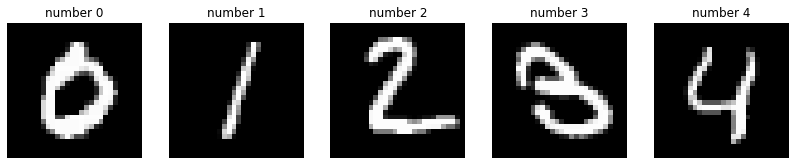

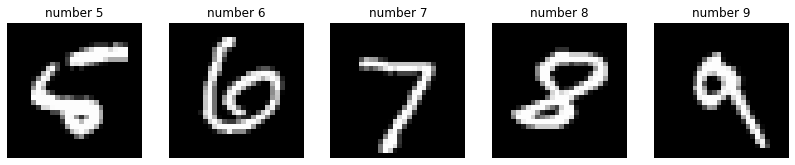

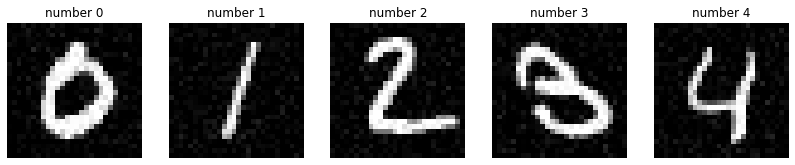

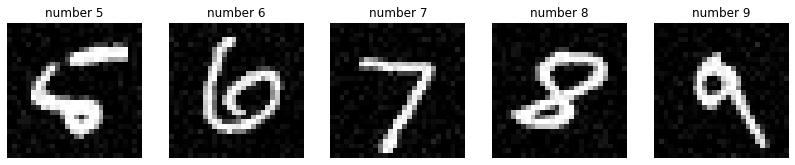

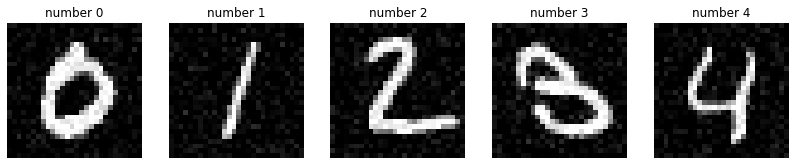

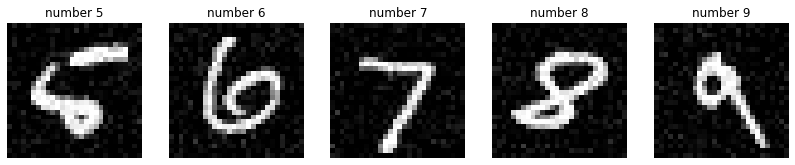

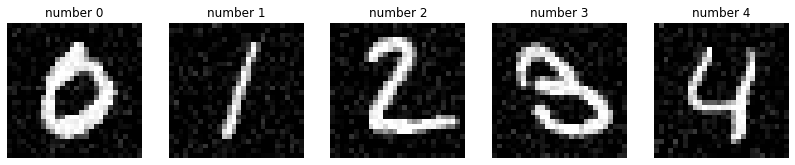

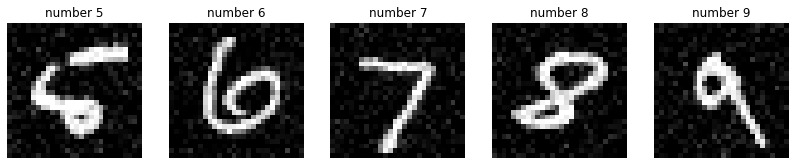

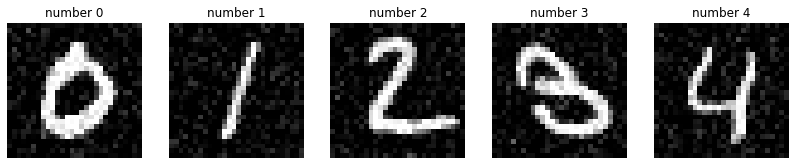

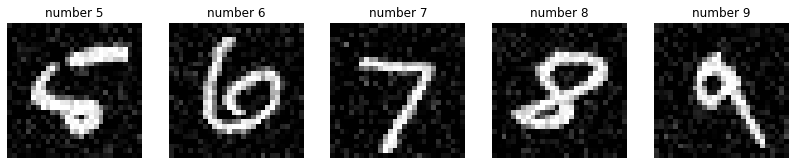

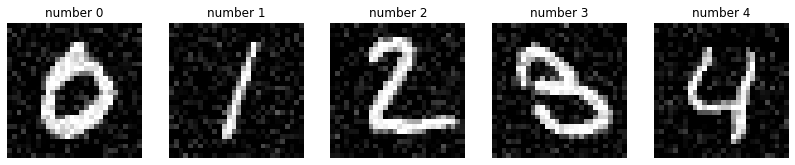

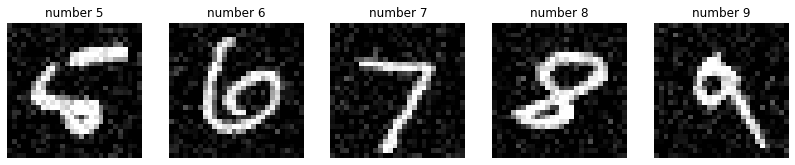

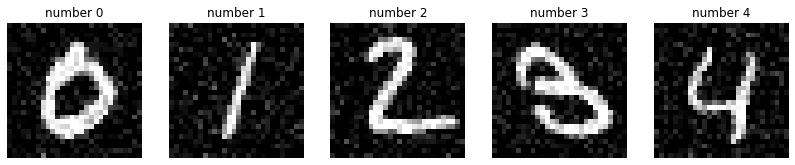

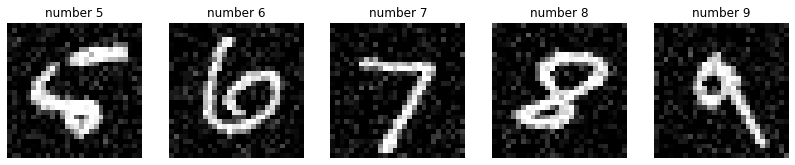

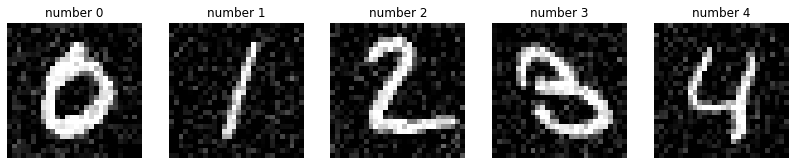

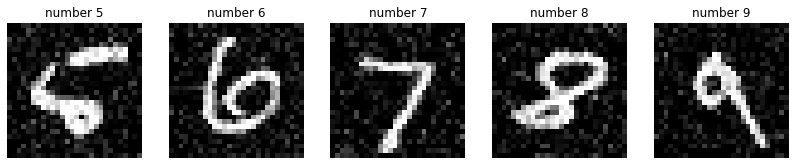

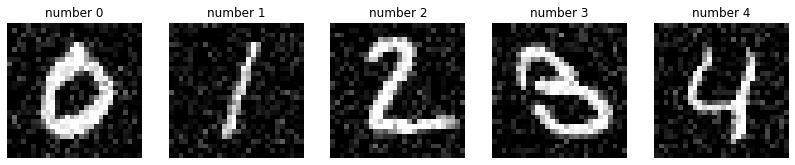

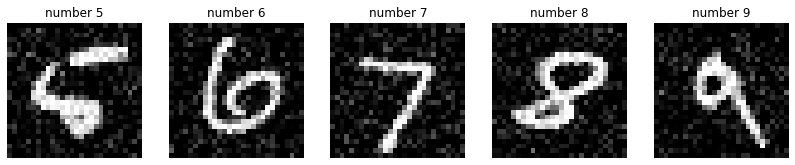

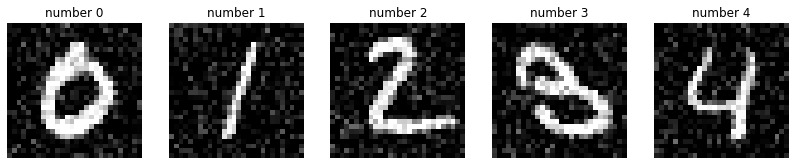

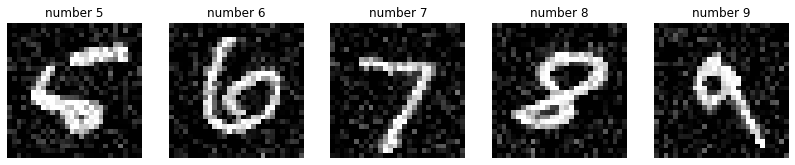

In [ ]:
show(x_test,Ind_te)
show(GN_1_te,Ind_te)
show(GN_2_te,Ind_te)
show(GN_3_te,Ind_te)
show(GN_4_te,Ind_te)
show(GN_5_te,Ind_te)
show(GN_6_te,Ind_te)
show(GN_7_te,Ind_te)
show(GN_8_te,Ind_te)
show(GN_9_te,Ind_te)

#### Increasing Salt&Pepper

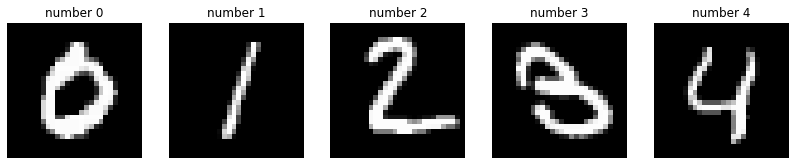

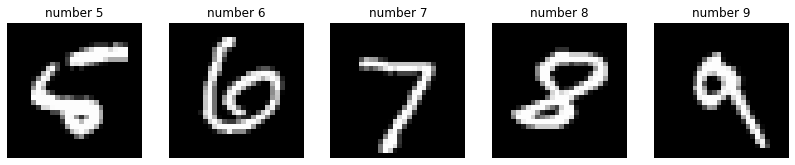

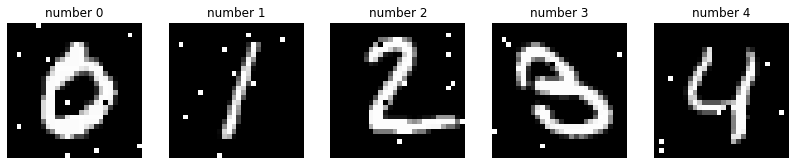

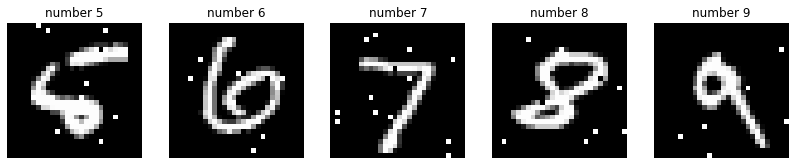

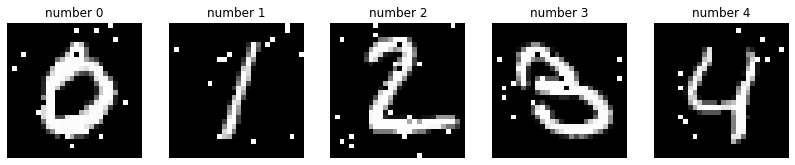

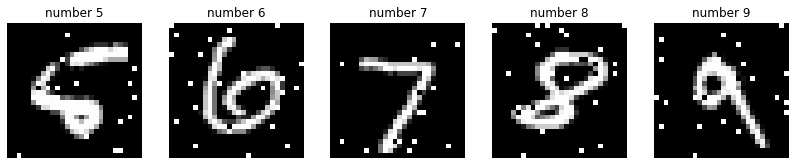

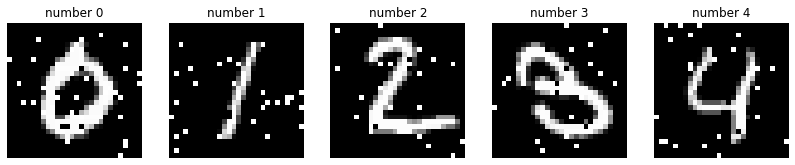

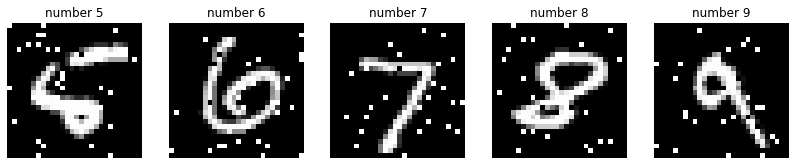

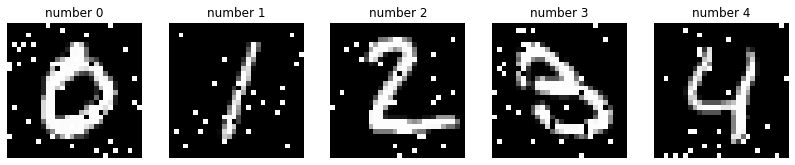

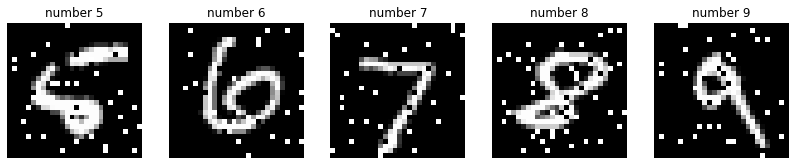

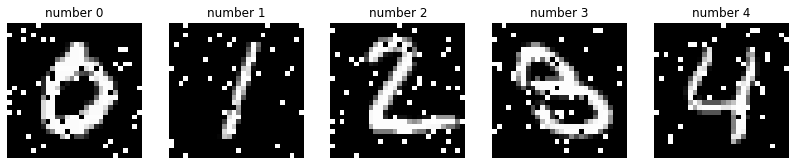

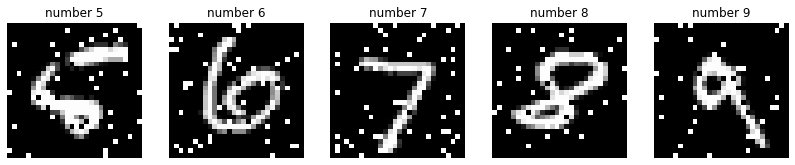

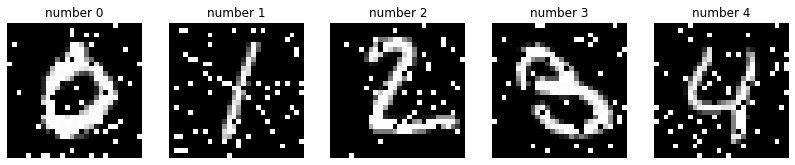

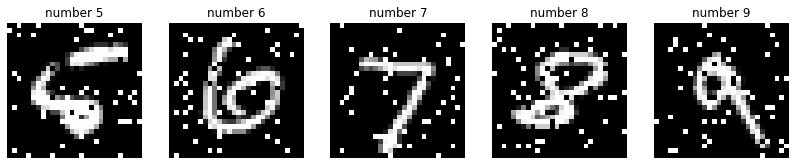

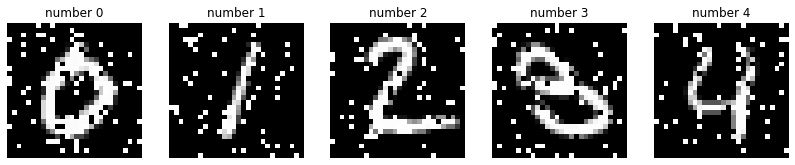

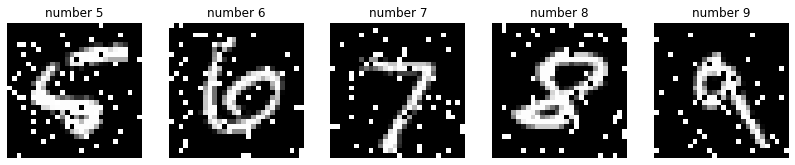

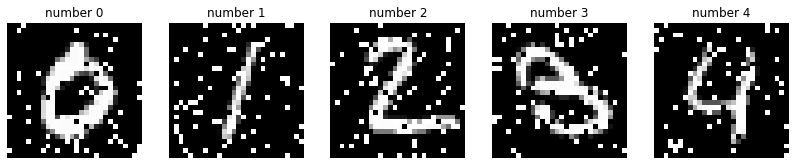

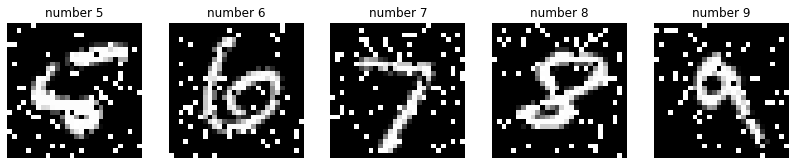

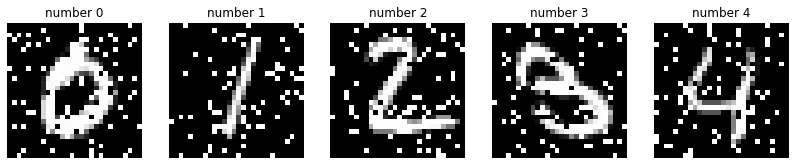

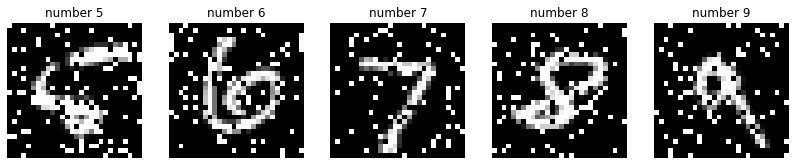

In [ ]:
show(x_test,Ind_te)
show(SP_1_te,Ind_te)
show(SP_2_te,Ind_te)
show(SP_3_te,Ind_te)
show(SP_4_te,Ind_te)
show(SP_5_te,Ind_te)
show(SP_6_te,Ind_te)
show(SP_7_te,Ind_te)
show(SP_8_te,Ind_te)
show(SP_9_te,Ind_te)

### GradCam

#### Increasing Gaussian Noise

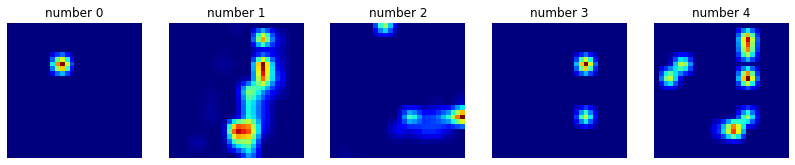

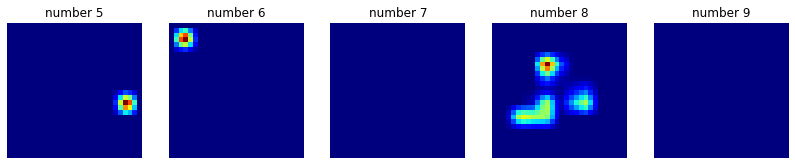

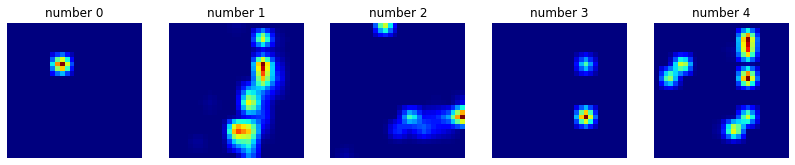

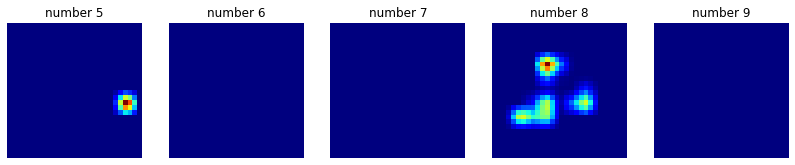

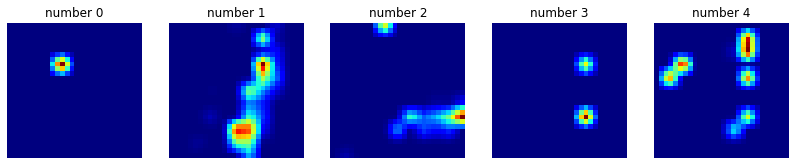

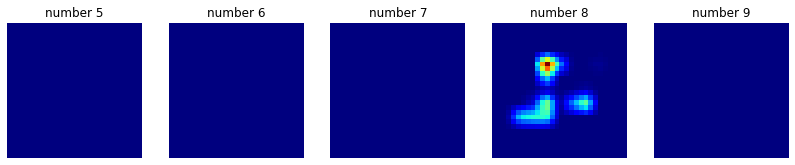

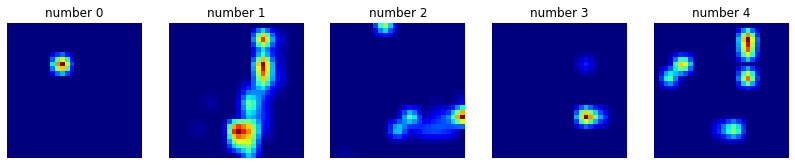

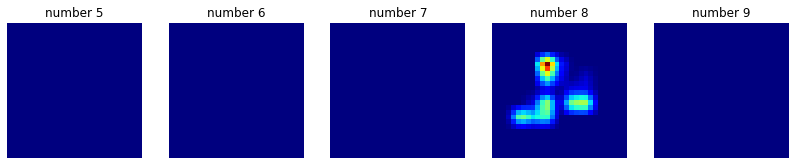

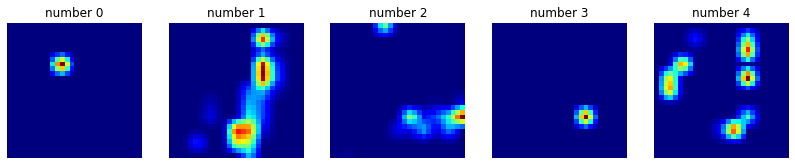

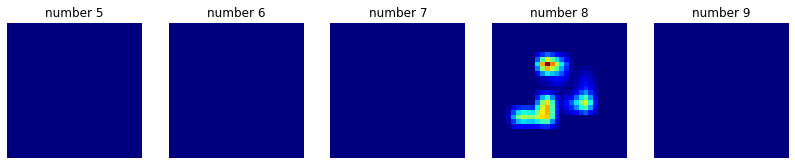

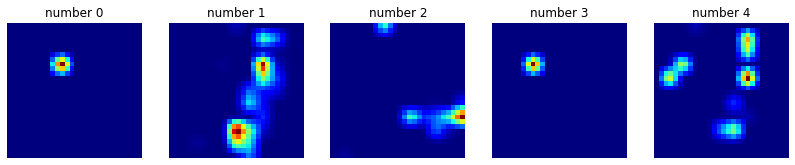

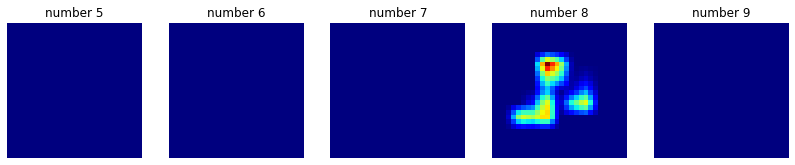

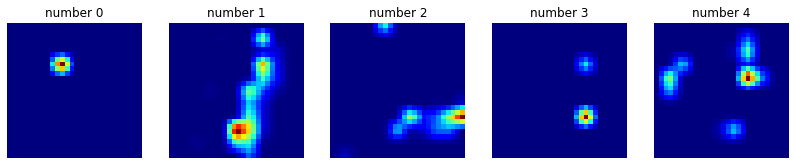

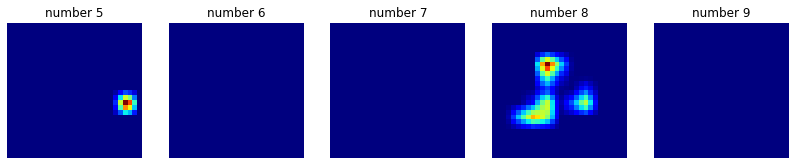

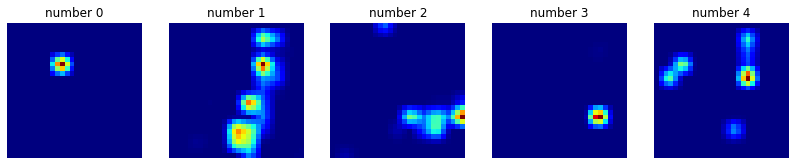

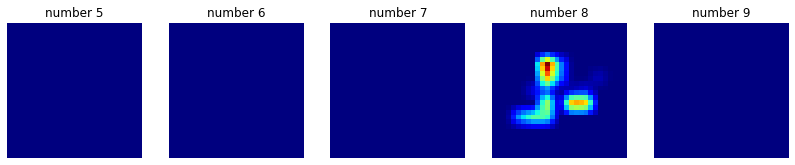

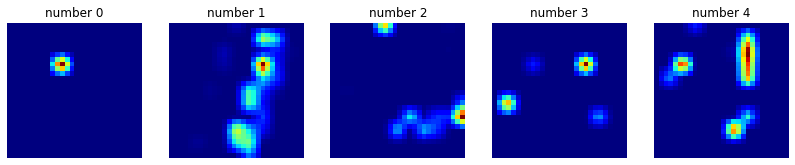

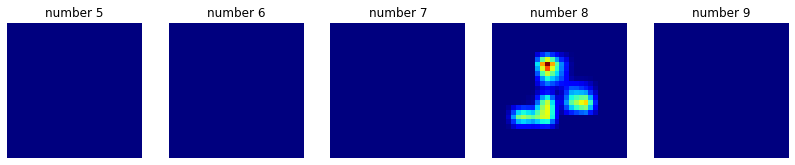

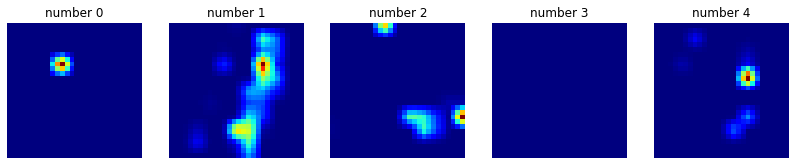

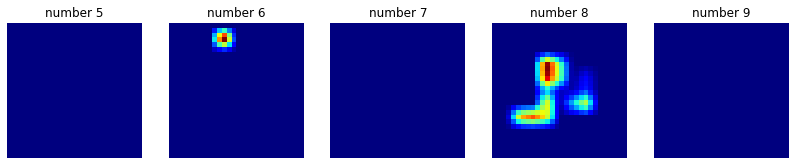

In [ ]:
showH(GRA_0)
showH(GRA_GN_1)
showH(GRA_GN_2)
showH(GRA_GN_3)
showH(GRA_GN_4)
showH(GRA_GN_5)
showH(GRA_GN_6)
showH(GRA_GN_7)
showH(GRA_GN_8)
showH(GRA_GN_9)

#### Increasing Salt&Pepper

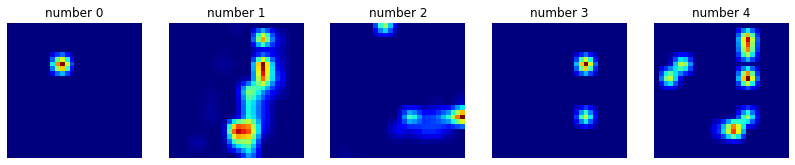

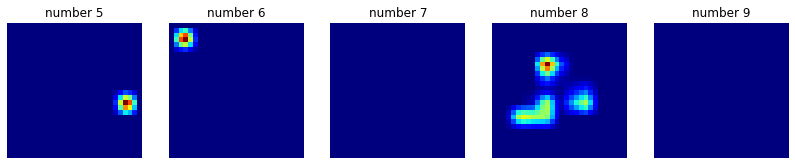

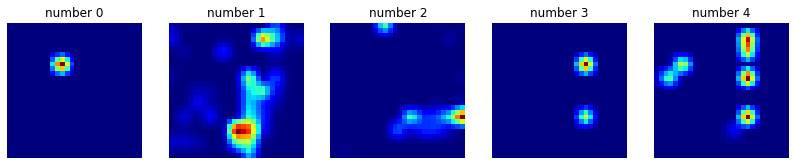

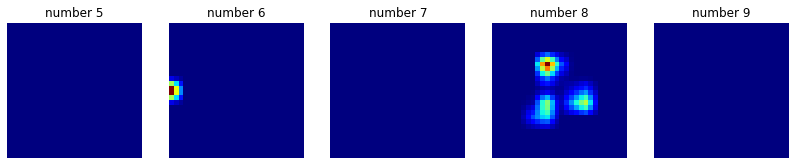

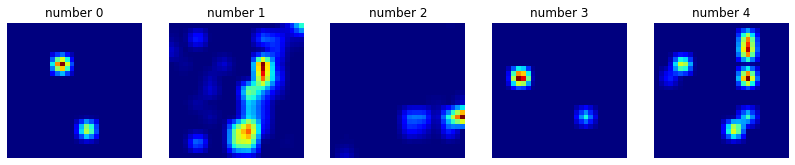

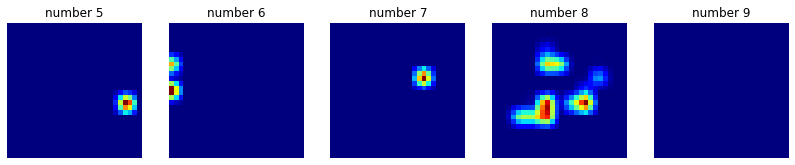

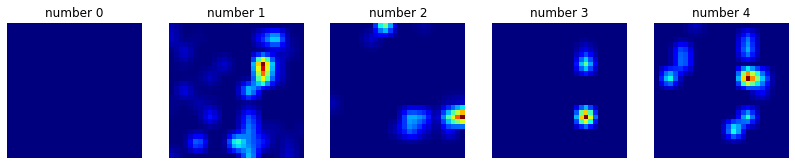

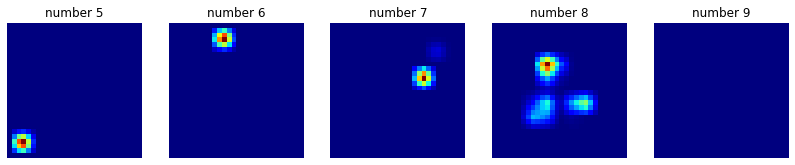

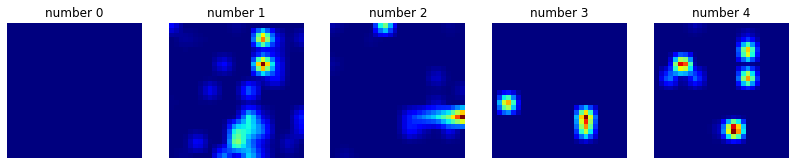

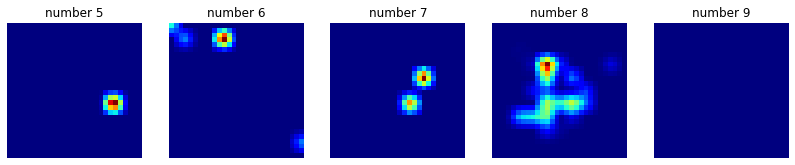

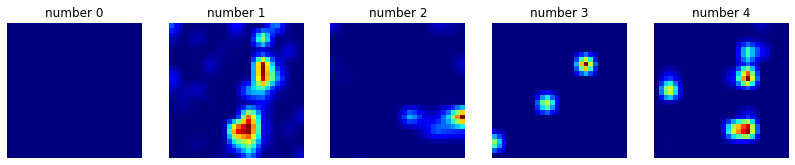

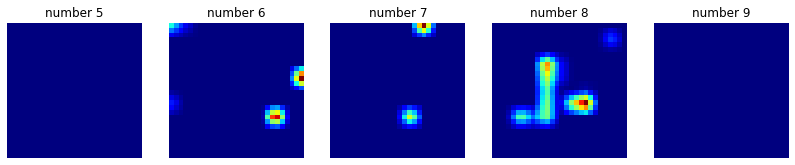

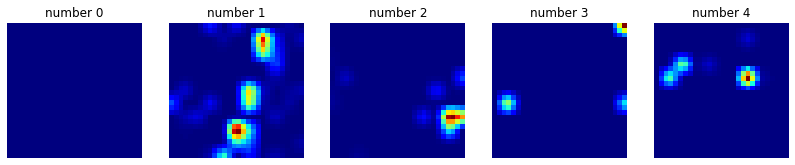

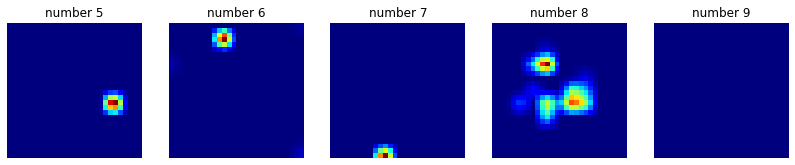

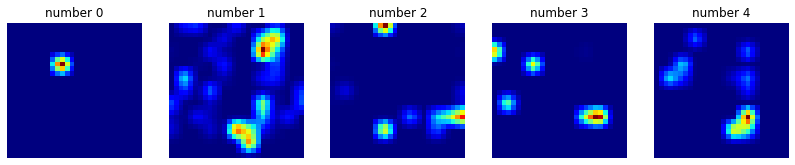

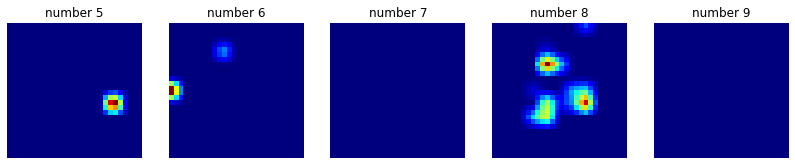

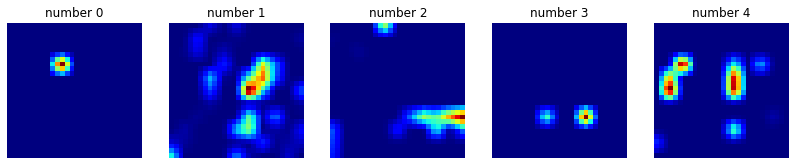

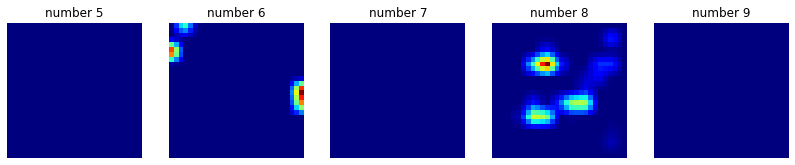

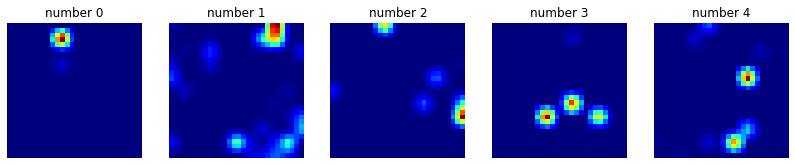

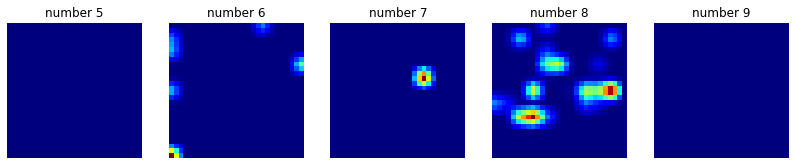

In [ ]:
showH(GRA_0)
showH(GRA_SP_1)
showH(GRA_SP_2)
showH(GRA_SP_3)
showH(GRA_SP_4)
showH(GRA_SP_5)
showH(GRA_SP_6)
showH(GRA_SP_7)
showH(GRA_SP_8)
showH(GRA_SP_9)

### GradCam Plus

#### Increasing Gaussian Noise

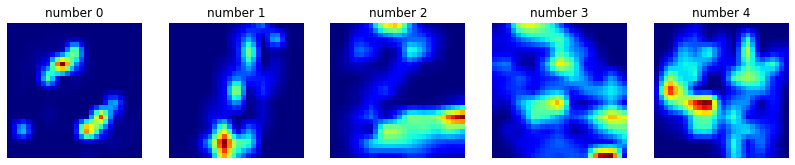

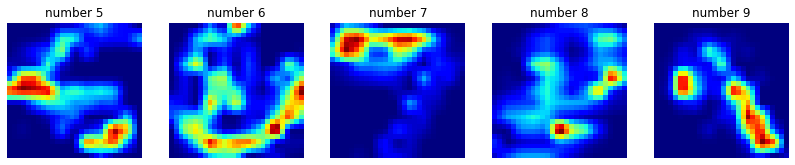

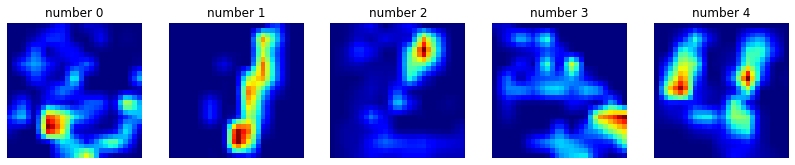

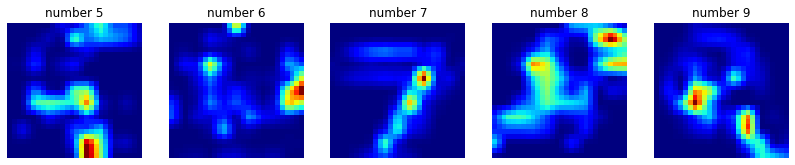

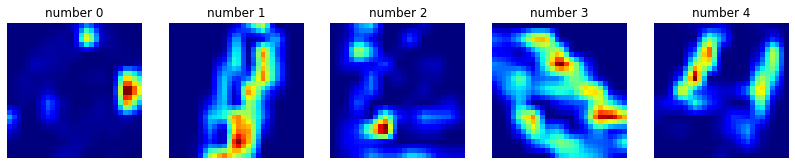

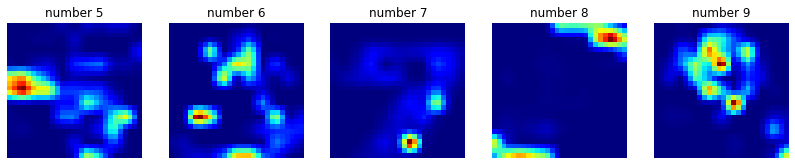

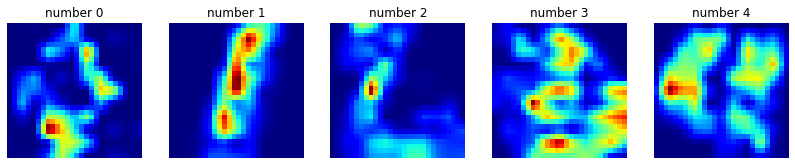

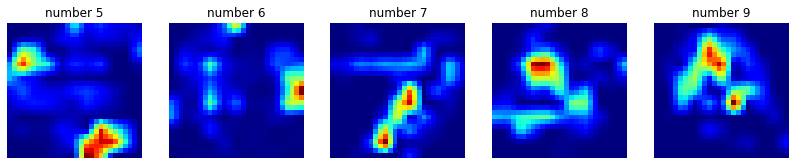

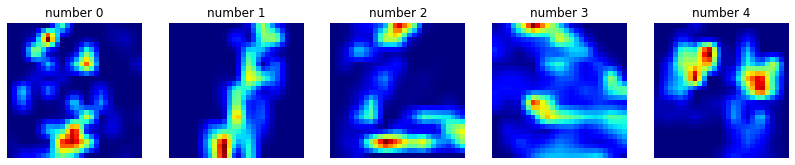

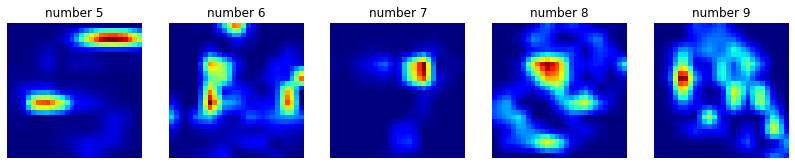

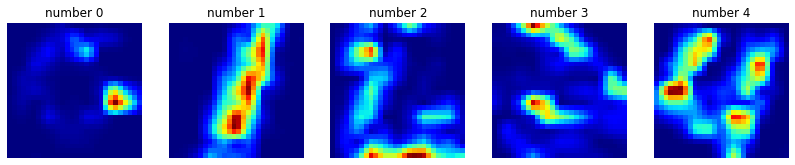

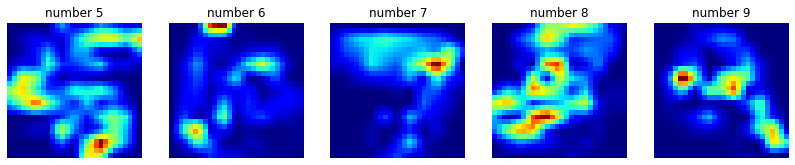

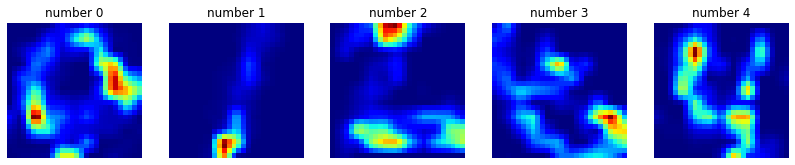

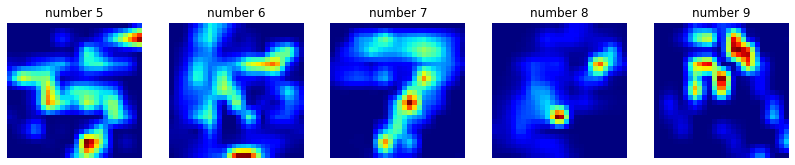

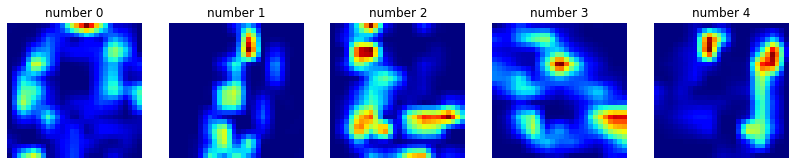

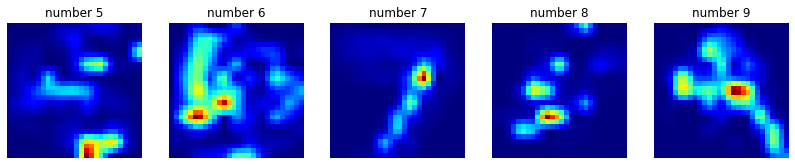

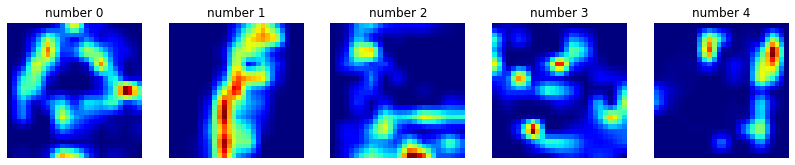

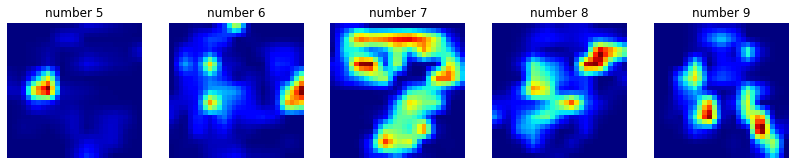

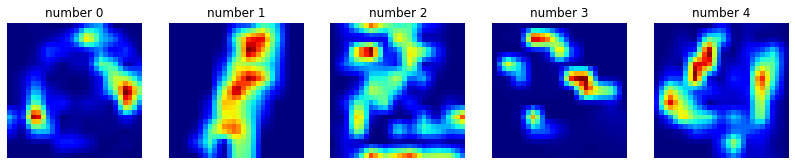

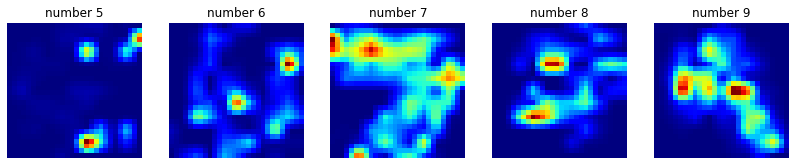

In [ ]:
showH(GRA_P_0)
showH(GRA_P_GN_1)
showH(GRA_P_GN_2)
showH(GRA_P_GN_3)
showH(GRA_P_GN_4)
showH(GRA_P_GN_5)
showH(GRA_P_GN_6)
showH(GRA_P_GN_7)
showH(GRA_P_GN_8)
showH(GRA_P_GN_9)

#### Increasing Salt&Pepper

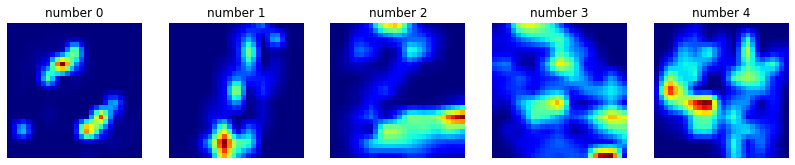

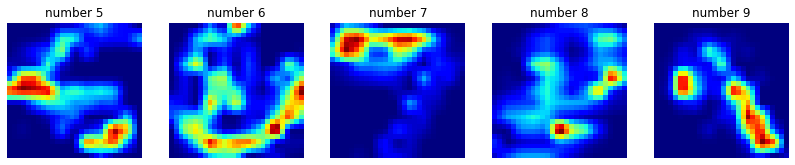

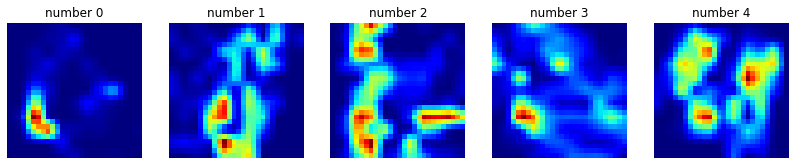

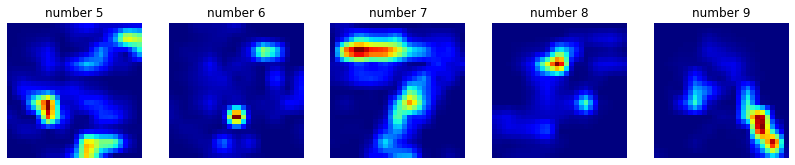

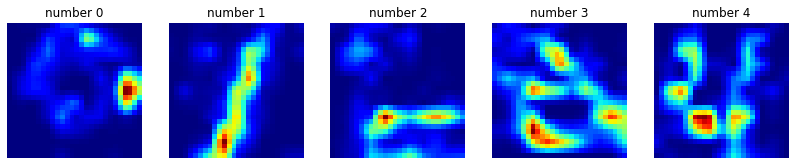

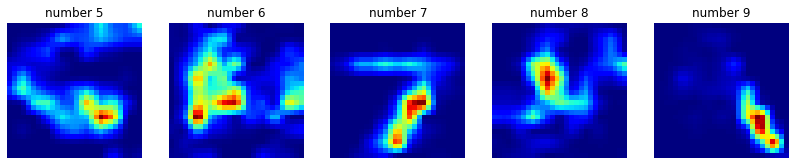

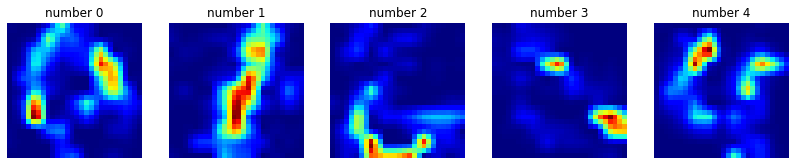

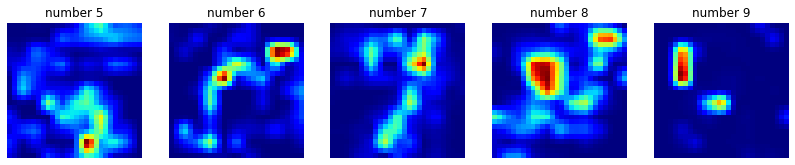

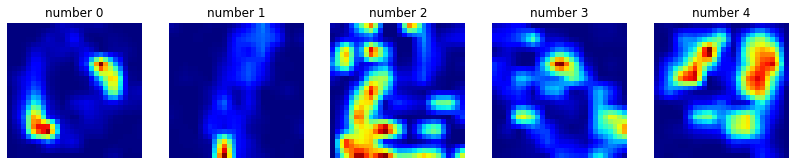

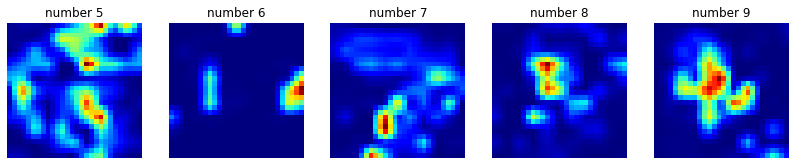

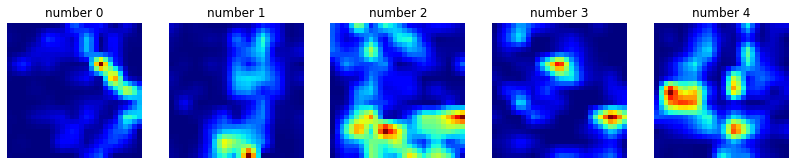

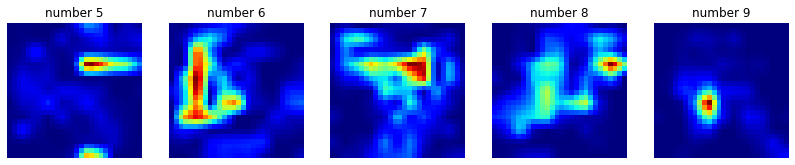

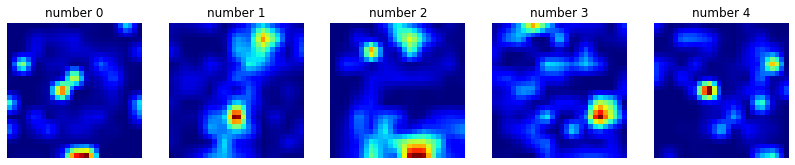

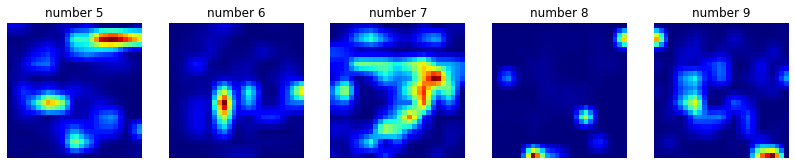

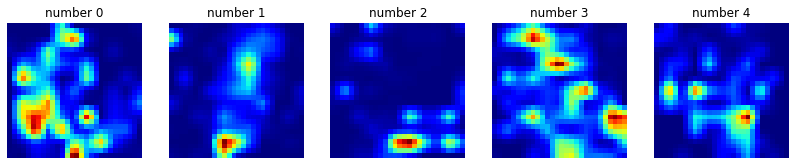

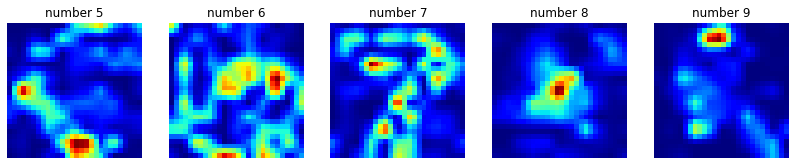

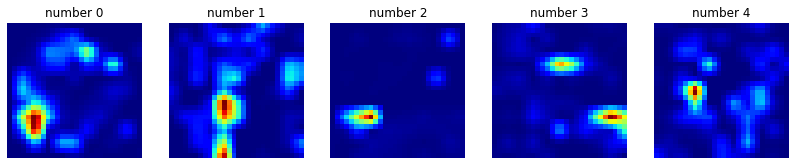

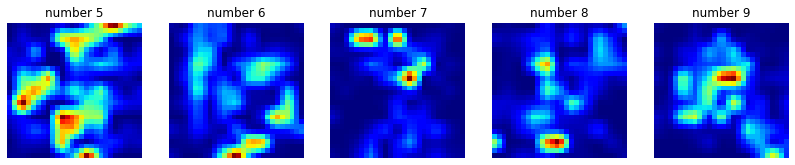

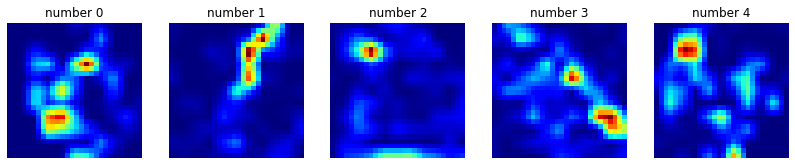

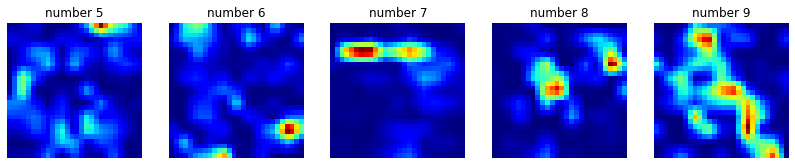

In [ ]:
showH(GRA_P_0)
showH(GRA_P_SP_1)
showH(GRA_P_SP_2)
showH(GRA_P_SP_3)
showH(GRA_P_SP_4)
showH(GRA_P_SP_5)
showH(GRA_P_SP_6)
showH(GRA_P_SP_7)
showH(GRA_P_SP_8)
showH(GRA_P_SP_9)

## Score

In [ ]:
score_0 = mod_0.evaluate(x_test, y_test_cat, verbose=0)

score_GN_1 = mod_GN_1.evaluate(GN_1_te, y_test_cat, verbose=0)
score_GN_2 = mod_GN_2.evaluate(GN_2_te, y_test_cat, verbose=0)
score_GN_3 = mod_GN_3.evaluate(GN_3_te, y_test_cat, verbose=0)
score_GN_4 = mod_GN_4.evaluate(GN_4_te, y_test_cat, verbose=0)
score_GN_5 = mod_GN_5.evaluate(GN_5_te, y_test_cat, verbose=0)
score_GN_6 = mod_GN_6.evaluate(GN_6_te, y_test_cat, verbose=0)
score_GN_7 = mod_GN_7.evaluate(GN_7_te, y_test_cat, verbose=0)
score_GN_8 = mod_GN_8.evaluate(GN_8_te, y_test_cat, verbose=0)
score_GN_9 = mod_GN_9.evaluate(GN_9_te, y_test_cat, verbose=0)

score_SP_1 = mod_SP_1.evaluate(SP_1_te, y_test_cat, verbose=0)
score_SP_2 = mod_SP_2.evaluate(SP_2_te, y_test_cat, verbose=0)
score_SP_3 = mod_SP_3.evaluate(SP_3_te, y_test_cat, verbose=0)
score_SP_4 = mod_SP_4.evaluate(SP_4_te, y_test_cat, verbose=0)
score_SP_5 = mod_SP_5.evaluate(SP_5_te, y_test_cat, verbose=0)
score_SP_6 = mod_SP_6.evaluate(SP_6_te, y_test_cat, verbose=0)
score_SP_7 = mod_SP_7.evaluate(SP_7_te, y_test_cat, verbose=0)
score_SP_8 = mod_SP_8.evaluate(SP_8_te, y_test_cat, verbose=0)
score_SP_9 = mod_SP_9.evaluate(SP_9_te, y_test_cat, verbose=0)

In [ ]:
print(score_0)
print(score_GN_1)
print(score_GN_2)
print(score_GN_3)
print(score_GN_4)
print(score_GN_5)
print(score_GN_6)
print(score_GN_7)
print(score_GN_8)
print(score_GN_9)

print(score_0)
print(score_SP_1)
print(score_SP_2)
print(score_SP_3)
print(score_SP_4)
print(score_SP_5)
print(score_SP_6)
print(score_SP_7)
print(score_SP_8)
print(score_SP_9)

[0.028373029083013535, 0.9940000176429749]
[0.028111688792705536, 0.9937999844551086]
[0.026235610246658325, 0.9936000108718872]
[0.025924265384674072, 0.9939000010490417]
[0.02497997134923935, 0.9933000206947327]
[0.02525039203464985, 0.9939000010490417]
[0.027540426701307297, 0.9926999807357788]
[0.026353081688284874, 0.9929999709129333]
[0.025178909301757812, 0.9932000041007996]
[0.0273053627461195, 0.992900013923645]
[0.028373029083013535, 0.9940000176429749]
[0.02760513871908188, 0.9926000237464905]
[0.03247816488146782, 0.9916999936103821]
[0.03286504000425339, 0.9909999966621399]
[0.038605697453022, 0.9890999794006348]
[0.048588186502456665, 0.9869999885559082]
[0.06330930441617966, 0.9811000227928162]
[0.08676574379205704, 0.9753999710083008]
[0.1205202266573906, 0.9653000235557556]
[0.17243434488773346, 0.9532999992370605]
